In [ ]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# getting the current working directory

var = os.getcwd() 

print(var)

# note we are in the main project folder. if you are not there program won't run properly
# project folder is : Pandas-Analytics-Project

In [165]:
# setting the directory and path to read our files for work 

path = "Data-Files"

# changing the folder and assigning it to a variable

os.chdir(path)




In [166]:

var = os.getcwd()
# using glob to access files from various data directory

files = glob.glob(var + '/*.csv')

# creating a list data type to store all the files which are been read
# in the files directory

lis = []





In [167]:
# now we then loop into the directory of files and read each file
# and append into the list we created above

for fi in files :
    tempfi = pd.read_csv(fi)
    # we now append the file into the list created
    lis.append(tempfi)
    

In [168]:
# we now concatenate our list element containing all files 
# to contain all files in the dataframe

df = pd.concat(lis,axis = 0)

In [169]:
# to view the first few records in the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [72]:
# checking the number of rows and column in the dataset
df.shape

(1000, 17)

In [170]:
# let me view all the columns present in the dataset 

df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [171]:
# let me check the statistical summary using the describe method

df.describe

<bound method NDFrame.describe of       Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
323  148-41-7930      C  Port Harcourt        Normal    Male   
324  189-40-5216      C  Port Harcourt        Normal    Male   
325  267-62-7380      C  Port Harcourt        Member    Male   
326  652-49-6720      C  Port Harcourt        Member  Female   
327  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  \
0        Food and beverages     19742.4         3   2961.36   62188.56   
1       Fashion accessories      5212.8         4

In [172]:
#  Electronic and accessories have the highest record of sales recorded
# where as health and beauty have the least sales

In [173]:
# checking missing value in the dataset with isnull and checking the sum of missing values

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [174]:
#checking if null values are not present in the dataset

df.notnull().sum()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [175]:
# checking information about the dataframe 
df.info

<bound method DataFrame.info of       Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
323  148-41-7930      C  Port Harcourt        Normal    Male   
324  189-40-5216      C  Port Harcourt        Normal    Male   
325  267-62-7380      C  Port Harcourt        Member    Male   
326  652-49-6720      C  Port Harcourt        Member  Female   
327  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  \
0        Food and beverages     19742.4         3   2961.36   62188.56   
1       Fashion accessories      5212.8         4  

In [176]:
# converting the date and time column to the proper datetime format
# converting for the date
df['Date'] = pd.to_datetime(df['Date'])

In [177]:
df['Date']

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
323   2019-01-23
324   2019-01-09
325   2019-03-29
326   2019-02-18
327   2019-01-29
Name: Date, Length: 1000, dtype: datetime64[ns]

In [180]:
# converting the time format

df['Datetime'] = pd.to_datetime(df['Time'])

In [ ]:
# returns an object type 
df['Datetime']

df['Time'] = df['Time'].dt.time


In [184]:
df['Time']

0      13:27:00
1      18:07:00
2      17:03:00
3      16:19:00
4      15:30:00
         ...   
323    10:33:00
324    11:40:00
325    19:12:00
326    11:40:00
327    13:46:00
Name: Time, Length: 1000, dtype: object

In [185]:
# Checking if the date and time column updated
df.info

<bound method DataFrame.info of       Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
323  148-41-7930      C  Port Harcourt        Normal    Male   
324  189-40-5216      C  Port Harcourt        Normal    Male   
325  267-62-7380      C  Port Harcourt        Member    Male   
326  652-49-6720      C  Port Harcourt        Member  Female   
327  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  \
0        Food and beverages     19742.4         3   2961.36   62188.56   
1       Fashion accessories      5212.8         4  

In [186]:
# Extracting day , month and year from date column to a different 
# column each on the dataset

df['Day'] = df['Date'].dt.day # extracting day and putting in a different column
df['Month'] = df['Date'].dt.month # extracting month and putting in a different column
df['Year'] = df['Date'].dt.year # extracting year and putting in a different column
df.head() # checking the first few records

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Day,Month,Year
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,13:27:00,Card,59227.2,4.761905,2961.36,5.9,2023-06-03 13:27:00,20,2,2019
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,18:07:00,Epay,20851.2,4.761905,1042.56,4.5,2023-06-03 18:07:00,6,2,2019
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,17:03:00,Cash,36734.4,4.761905,1836.72,6.8,2023-06-03 17:03:00,9,3,2019
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,16:19:00,Cash,202435.2,4.761905,10121.76,4.5,2023-06-03 16:19:00,15,1,2019
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,15:30:00,Epay,29016.0,4.761905,1450.80,4.4,2023-06-03 15:30:00,11,3,2019


In [187]:
# getting the hour
df['Hour'] = df['Datetime'].dt.hour

In [188]:
df['Hour']

0      13
1      18
2      17
3      16
4      15
       ..
323    10
324    11
325    19
326    11
327    13
Name: Hour, Length: 1000, dtype: int64

In [189]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Datetime', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [191]:
# getting the unique hours of sales in the supermarket and saving the details
uniquehours = df['Hour'].unique()
uniquehours

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [193]:
# knowing the number of unique hours of sales in the supermarket
num = df['Hour'].nunique()
num

11

In [200]:
# checking if a column in dataset is of object datatype and storing the information
# a list variable 

categorical_columns = [col for col in df.columns if df[col].dtype == "object"]

categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

In [199]:
# the categorical column code above can be written below as this too.
cat = []
for col in df.columns:
    if df[col].dtype == "object":
        tempcol = col
        cat.append(tempcol)

cat

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

In [352]:
# getting the unique values of each categorical column
uniqinvoice = df['Invoice ID'].unique().tolist()
uniqcity = df['City'].unique().tolist()
uniqcustomer = df['Customer type'].unique().tolist()
uniquegen = df['Gender'].unique().tolist()
uniquepro = df['Product line'].unique().tolist()
uniquetime = df['Time'].unique().tolist()
uniqpayment = df['Payment'].unique().tolist()

#  here we get a dataframe of all the unique item in data

unilis = []

for li in cat:
    templis = df[li].unique().tolist()
    unilis.append(templis)

uniqdata = pd.DataFrame(unilis)
unilis
uniqdata

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,692-92-5582,351-62-0822,529-56-3974,299-46-1805,319-50-3348,371-85-5789,273-16-6619,649-29-6775,145-94-9061,871-79-8483,...,867-47-1948,256-58-3609,364-34-2972,744-82-9138,728-47-9078,148-41-7930,189-40-5216,267-62-7380,652-49-6720,233-67-5758
1,B,A,C,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Abuja,Lagos,Port Harcourt,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Member,Normal,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Female,Male,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Food and beverages,Fashion accessories,Electronic accessories,Sports and travel,Home and lifestyle,Health and beauty,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,13:27:00,18:07:00,17:03:00,16:19:00,15:30:00,10:40:00,12:20:00,15:31:00,19:48:00,19:39:00,...,None,None,None,None,None,None,None,None,None,None
7,Card,Epay,Cash,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [342]:
uniqcity

['Abuja', 'Lagos', 'Port Harcourt']

In [236]:
# counting the total number of unique values in each element above

df[['Invoice ID','City','Customer type','Gender','Product line','Time','Payment']].value_counts()

Invoice ID   City           Customer type  Gender  Product line         Time      Payment
101-17-6199  Lagos          Normal         Male    Food and beverages   19:44:00  Card       1
641-62-7288  Abuja          Normal         Male    Home and lifestyle   13:33:00  Epay       1
633-91-1052  Lagos          Normal         Female  Home and lifestyle   15:51:00  Cash       1
634-97-8956  Lagos          Normal         Male    Food and beverages   17:27:00  Card       1
635-28-5728  Lagos          Normal         Male    Health and beauty    19:33:00  Epay       1
                                                                                            ..
373-14-0504  Lagos          Member         Female  Sports and travel    14:33:00  Epay       1
373-73-7910  Lagos          Normal         Male    Sports and travel    10:37:00  Epay       1
373-88-1424  Port Harcourt  Member         Male    Home and lifestyle   18:44:00  Epay       1
374-17-3652  Abuja          Member         Female  Food

In [294]:
# grouping the city column and getting the sum and mean 
df_2 =  df.groupby('City').sum()
df_2.reset_index(inplace = True)

# getting the total sales of each city 

df_2

,City,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
1,Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
2,Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [295]:
# getting the city with the highest sales which is port harcourt as shown below
df_2['Total']

0    38231161.92
1    38232133.38
2    39804734.34
Name: Total, dtype: float64

In [296]:
#getting the mean of each city

df_2['Total'].mean()

38756009.88

<AxesSubplot:xlabel='City', ylabel='count'>

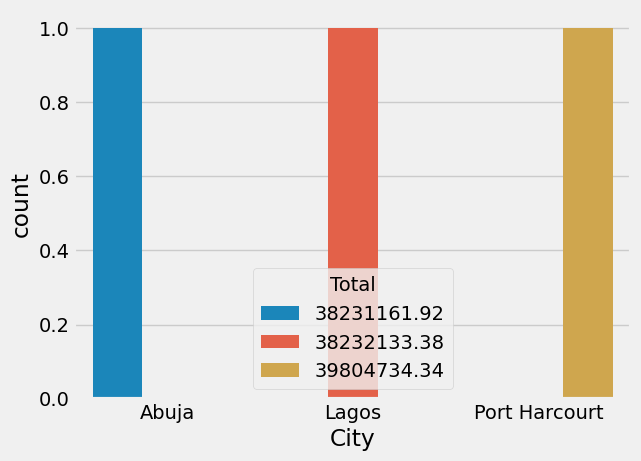

In [307]:
#using countplot to determine the branch with the highest sales record

sns.countplot('City',hue = 'Total', data = df_2)

In [290]:
# deriving the payment method which is the most use
df1 = df.groupby('Payment').sum()
df1.reset_index(inplace=True)

In [291]:
# SELECTING THE TOTAL PAYMENT METHOD USE
df1

,Payment,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,Card,6090004.8,1722,1727435.52,36276145.92,34548710.4,1480.952381,1727435.52,2178.0,4600,617,627909,4653
1,Cash,7029032.4,1896,1923541.20,40394365.20,38470824.0,1638.095238,1923541.20,2397.7,5336,676,694536,5061
2,Epay,6922929.6,1892,1885596.12,39597518.52,37711922.4,1642.857143,1885596.12,2397.0,5320,700,696555,5196


In [292]:
# getting the total use in paying for each payment method
df1['Total']

0    36276145.92
1    40394365.20
2    39597518.52
Name: Total, dtype: float64

<AxesSubplot:xlabel='Payment', ylabel='count'>

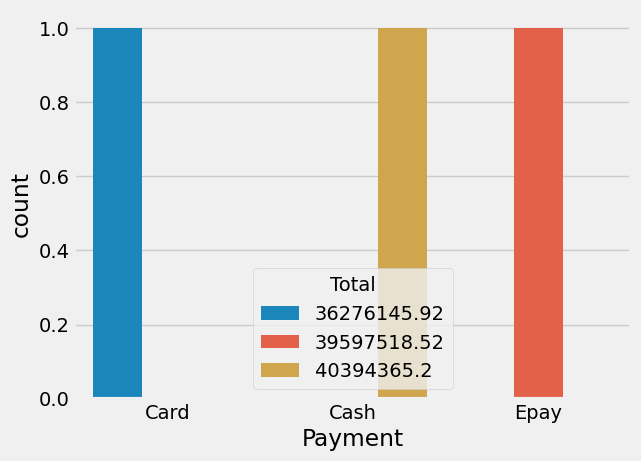

In [308]:
# ploting the graph

sns.countplot(x = 'Payment',hue = 'Total',data = df1)

In [298]:
# determining the highest and lowest product sold line using count plot

df3 = df.groupby('Product line').sum()
df3.reset_index(inplace=True)
df3

,Product line,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,Electronic accessories,3277357.2,971,931500.54,19561511.34,18630010.8,809.523810,931500.54,1177.2,2759,348,343230,2548
1,Fashion accessories,3662406.0,902,930958.20,19550122.20,18619164.0,847.619048,930958.20,1251.2,2717,346,359382,2680
2,Food and beverages,3508394.4,952,962483.04,20212143.84,19249660.8,828.571429,962483.04,1237.7,2645,348,351306,2677
3,Health and beauty,3001636.8,854,843321.24,17709746.04,16866424.8,723.809524,843321.24,1064.5,2373,312,306888,2260
4,Home and lifestyle,3186255.6,911,923347.08,19390288.68,18466941.6,761.904762,923347.08,1094.0,2287,324,323040,2312
5,Sports and travel,3405916.8,920,944962.74,19844217.54,18899254.8,790.476190,944962.74,1148.1,2475,315,335154,2433


<AxesSubplot:xlabel='count', ylabel='Product line'>

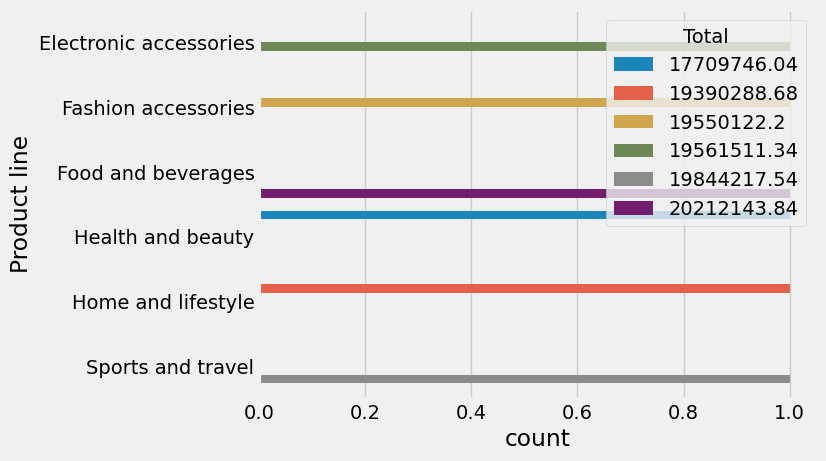

In [309]:
# plotting the count plot

sns.countplot(y = 'Product line',hue = 'Total',data = df3)

In [300]:
# the highest sold product line is food and beverages
# the lowest is  Health and beauty

In [311]:
df4 = df.groupby('Branch').sum()
df4.reset_index(inplace=True)
df4

,Branch,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,A,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
1,B,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
2,C,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


<AxesSubplot:xlabel='Branch', ylabel='count'>

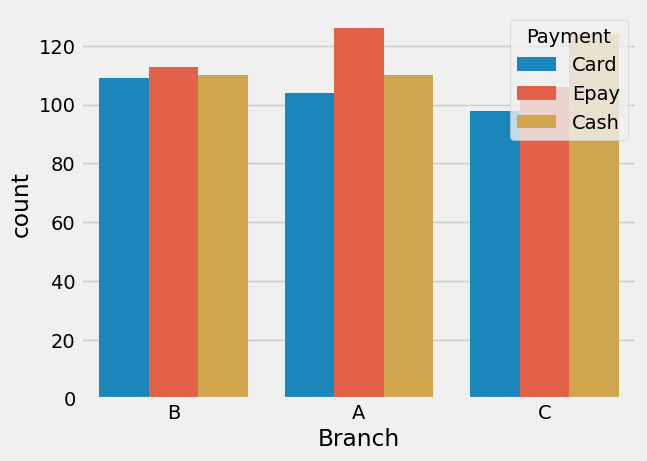

In [315]:
# plotting the most payment use per branch

sns.countplot(x = 'Branch', hue = 'Payment', data = df)

In [316]:
# in branch B EPAY IS USE THE MOST
# in branch A EPAY IS USE THE MOST
# in branch C CASH IS USE THE MOST

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

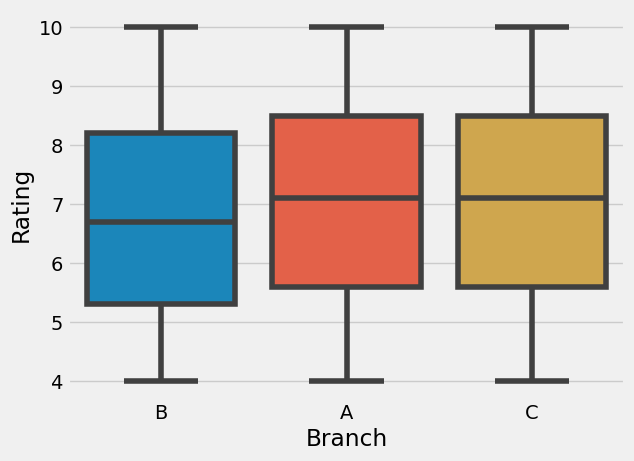

In [324]:
# to determine the branch with the lowest rating
sns.boxplot(x = 'Branch' , y = 'Rating' , data = df)

In [ ]:
# from the graph above the branch B have the lowest rating 

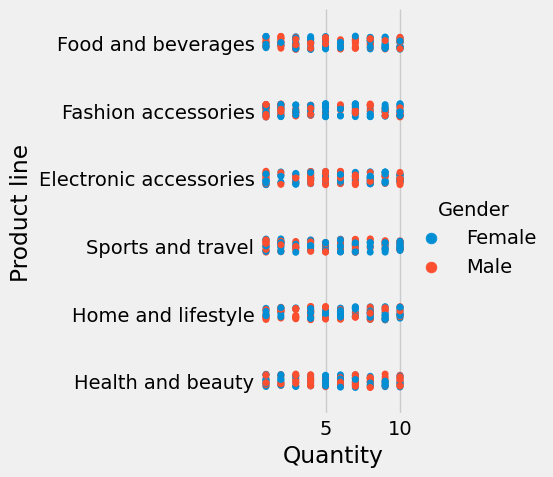

In [327]:
# since the x axis was over populated with the y axis , i had to flip the axis
sns.catplot( x  = 'Quantity', y = 'Product line', hue = 'Gender', data = df)

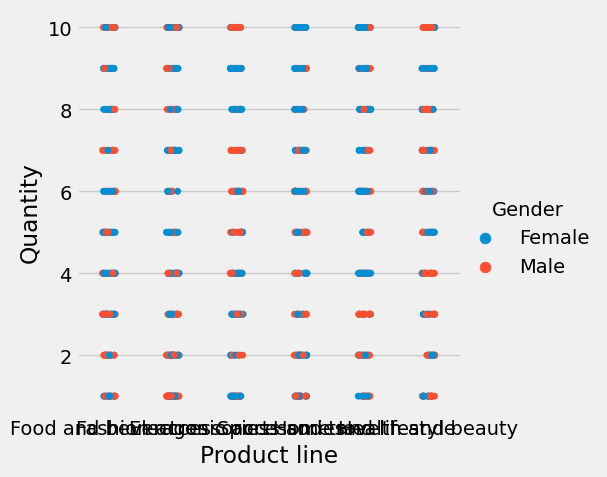

In [332]:
# using scatter plot to determine the gender distrubution

sns.catplot(x = 'Product line' , y  = 'Quantity' ,hue = 'Gender', data = df)

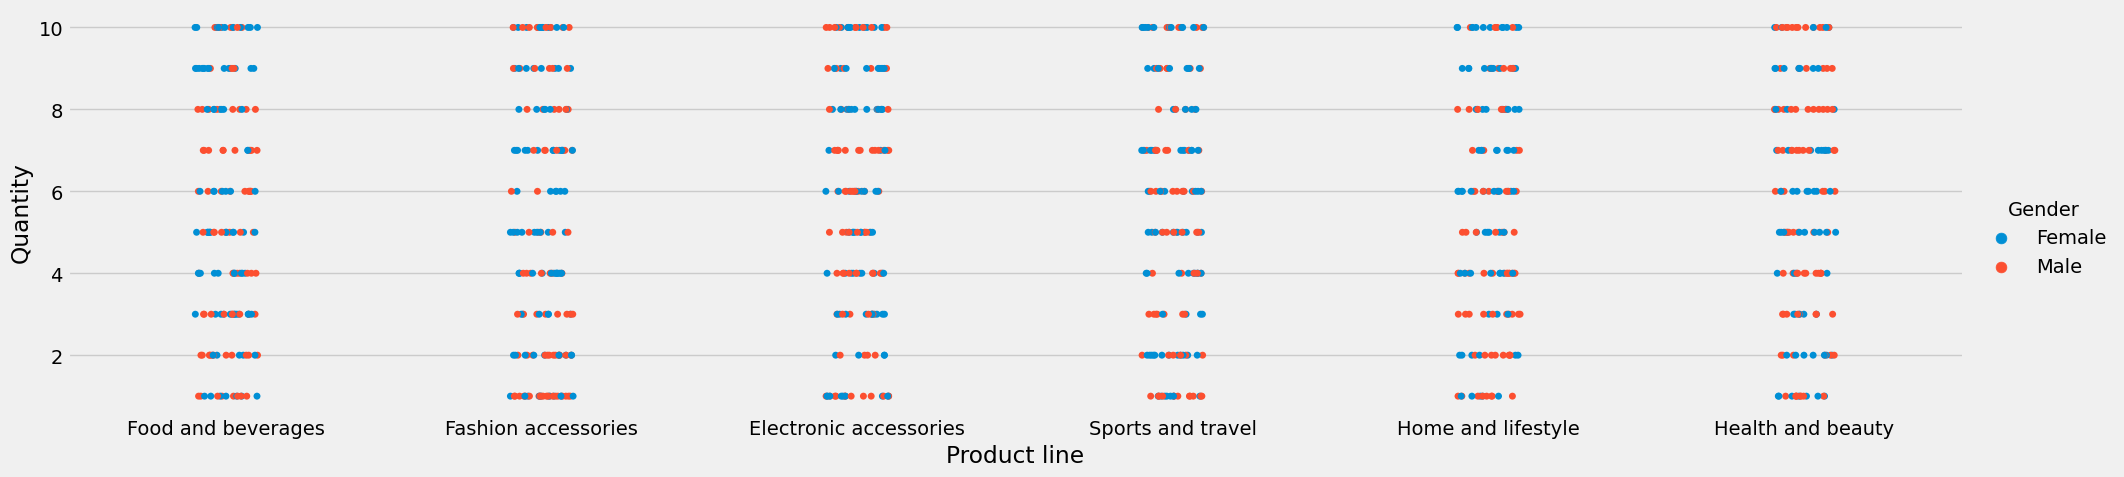

In [331]:
# using scatter plot to determine the gender distrubution
# setting the aspect parameter to 4 for spacing accross the x axis
sns.catplot(x = 'Product line' , y  = 'Quantity', aspect = 4 ,hue = 'Gender', data = df)

In [ ]:
# summary from the graph
# both male and female are interested in all product line


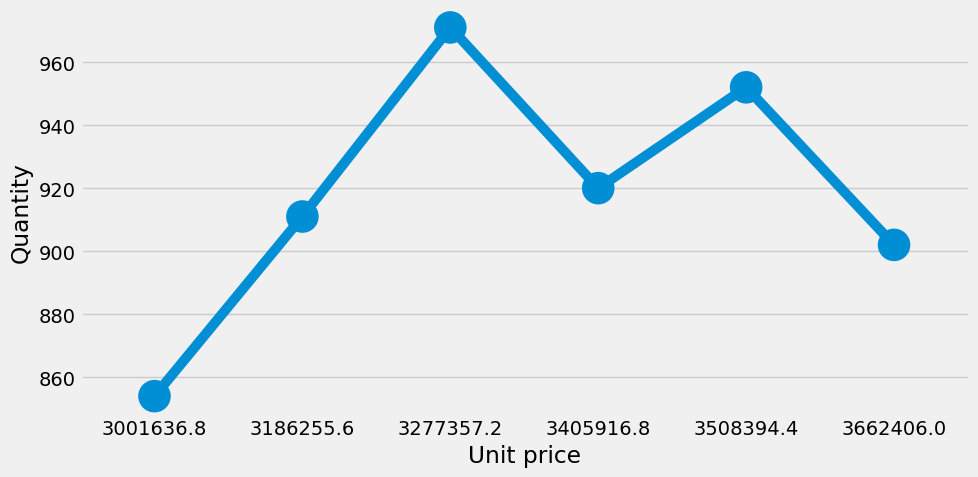

In [336]:
# plotting a graph to see the product line on the quantity of good been purchase
# we will be taking our data from productline groupby data which is df3
# setting the aspect to 2 for some spacing in the x axis
sns.catplot(x = 'Unit price', y = 'Quantity',aspect = 2, kind='point' , data = df3 )

In [ ]:
# the was a steady increase in product quanity when the unit price was between
# 3001636.8 and 3277357.2
# after that the product quantity fell when unit price was at  3.4m
# increasing the unit price to 3.5m couldnt get back the original product quantity when it was 3.2m
# at 3.6m  the product quantity fell more. 